In [1]:
# Define colors
Pitt.Blue<- "#003594"
Pitt.Gold<-"#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"
# ggplot preferences
library("ggplot2")
library("repr")
options(repr.plot.width=10, repr.plot.height=10/1.68)
Pitt.Theme<-theme( panel.background = element_rect(fill = "white", size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid', color =Pitt.Gray), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', color = "white")
  )
base<- ggplot() +aes()+ Pitt.Theme

# Maximum Likelihood 2: Inference
---
Here we'll try to do two things:
1. Outline some properties of Maximum Likelihood estimates
2. Examine how we can construct standard-errors and tests

## Properties of the Maximum Likelihood estimates:
---
Under some technical assumptions, the MLE estimator $\hat{\boldsymbol{\theta}}$ of an identifiable parameter vector $\boldsymbol{\theta}_0$  has the following properties:
1. Consistency: $\hat{\boldsymbol{\theta}}$ converges in probability to the true parameter  $\boldsymbol{\theta}_0$
2. Asymptotic Normality: $\sqrt{n}\left(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta}_0\right)$ converges in distribution to $\mathcal{N}(0,\Sigma)$
3. The estimator is efficient, where the asymptotic variance-covariance matrix $\Sigma$ is the smallest possible


Note that the above results are all large sample results
* We've already seen that the maximum-likelihood estimators can be **biased** in finite samples!
* Similarly, all of our inference will rely on the sample being *big*

With that proviso, let's dive into how we can compute the variance-covariance matrix $\Sigma$, and from this derive:
* standard errors
* confidence intervals

## Theory for the Variance-Covariance of MLE estimators
---
To find an estimator for $\Sigma$ we need to define a few other terms first.

First, we define the **score vector** assessed with any possible parameter $\boldsymbol{\theta}$ value as:
$$ \text{score vector}: \mathbf{s}(\boldsymbol{\theta}) =\frac{\partial\log L(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}}$$

So this is a vector of partial derivatives for the log-likelihood.

But from the chain rule, we know that this will be given by:
$$\mathbf{s}(\boldsymbol{\theta})=\frac{1}{L(\boldsymbol{\theta})}\frac{\partial L(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} $$

Second, we define the **Fisher Information Matrix** assessed at the **true** parameter value $\boldsymbol{\theta}_0$ as:
$$\text{Information matrix: }\mathbf{I}_{\boldsymbol{\theta}_0}=\mathbb{E}\left[ \mathbf{s}(\boldsymbol{\theta}_0) \mathbf{s}(\boldsymbol{\theta}_0)^T \right]= -\mathbb{E}\left[ \frac{\partial\log L(\boldsymbol{\theta}_0)}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T} \right] $$
The expectations here are over the realizations of our data which will be distributed according to $y$ (or $y|\mathbf{X}$ if we have covariates), so while the average value might have zero score, this will look a lot like the square of a mean-zero error.

## Cramer-Rao Inequality
A fundamental result in statistics is that under some technical restrictions on the underlying distributions:

If we have a vector of observations $\mathbf{z}$ which has a density given by $f(\mathbf{z};\boldsymbol{\theta}_0)$ for a finite set of parameters $\boldsymbol{\theta}_0$. Given the likelihood function $L(\tilde{\boldsymbol{\theta}})=f(\mathbf{z};\tilde{\boldsymbol{\theta}})$,  any unbiased estimator $\hat{\boldsymbol{\theta}}(\mathbf{z})$ of $\boldsymbol{\theta}_0$ satisfies:

$$\text{Var}\left(\hat{\boldsymbol{\theta}}(\mathbf{z})\right) \geq \tfrac{1}{n}\mathbf{I}(\boldsymbol{\theta}_0)^{-1}.$$

So, because the maximum likelihood estimator's asymptotic variance is exactly this, that means that the ML-estimator is asymptotically efficient!

If you have the right probability distribution, and a large amount of data, there is no better method than ML!

## Poisson Example (Theory)
---
Let's take our simple Poisson model for count data as an example, where the data is as series of counts $(k_1,k_2,\ldots,k_n)$ and there is a solitary parameter $\lambda$. The Likelihood function is given by:
$$ L(\lambda)= \prod_{i=1}^N \frac{\lambda^{k_i} e^{-\lambda}}{k_i !}.$$

So the Log-likelihood is given by:
$$ l(\lambda)= \sum_{i=1}^N  \left(k_i\cdot\log(\lambda)-\lambda -\log(k_i !)\right)$$

which means the score is????

The score is the derivative of the log-likelihood with respect to the parameters, which here is the scalar $\lambda$, so we have:
$$ s(\lambda)=\frac{\partial l(\lambda)}{\partial \lambda}= \sum^{N}_{i=1} \frac{k_i}{\lambda}-N $$

One formula we have for the Fisher Information matrix is given by:
$$ \mathbf{I}(\lambda)=\mathbb{E}\left[s(\lambda)^2\right]$$

which simplifies to:
$$\mathbf{I}(\lambda)=\mathbb{E}\left[\left( \sum^{N}_{i=1} \frac{k_i}{\lambda}-N  \right)^2\right]$$

We can expand this to...
$$\mathbf{I}(\lambda) = \mathbb{E}\left[ N^2 -\frac{2 N}{\lambda}\sum^{N}_{i=1} k_i + \frac{1}{\lambda^2}\left(\sum^{N}_{i=1} k_i\right)^2 \right] $$

Take out $N$ as a common element and write $\tfrac{1}{N}\sum_i k_i=\overline{k}$ to get
$$\mathbf{I}(\lambda) = \frac{N^2}{\lambda^2}\mathbb{E}\left[ \lambda^2 -2\lambda \overline{k} +\overline{k}^2 \right]$$

Moving the expectations inside the square bracket we get:
$$\mathbf{I}(\lambda)=\frac{N^2}{\lambda^2}\left[ \lambda^2 -2\lambda \mathbb{E}\overline{k} +\mathbb{E}\overline{k}^2 \right]$$

We know that each of the data draws $k_i$ is an *iid* draw from a Poisson$(\lambda)$, so the data draws have the property that:
* $\mathbb{E}k_i=\lambda$, so that means $\mathbb{E}\overline{k}=\lambda$
* $\text{Var}(k_i)=\lambda$, which means that $\mathbb{E}k_i^2=\lambda(1+\lambda)$

So we can simplify this expression to: 
$$\mathbf{I}(\lambda)=\frac{N^2}{\lambda^2}\left[ -\lambda^2 + \tfrac{N(N-1)}{N^2}\cdot \lambda^2 +\tfrac{1}{N}\lambda\cdot(1+\lambda) \right]$$

which if you multiply through you would find that:
$$\mathbf{I}(\lambda)= \frac{N}{\lambda} $$

In this particular case, the other formula for the Information matrix would have been far quicker!!
$$ \mathbf{I}(\lambda)=-\mathbb{E}\left[\frac{\partial^2 \log L(\lambda)}{\partial \lambda^2}\right]=-\mathbb{E}\left[\frac{\partial}{\partial \lambda} s(\lambda)\right]$$
which is
$$\mathbf{I}(\lambda)=-\mathbb{E}\left[\frac{\partial}{\partial \lambda}\left( \sum^{N}_{i=1} \frac{k_i}{\lambda}-N \right)\right]= \left[\sum^{N}_{i=1} \frac{\mathbb{E} k_i}{\lambda^2}\right]=\frac{N}{\lambda}$$

... and so our identity holds true!

## Poisson conclusion:
---
So the Cramer-Rao inequality tells us that every possible unbiased estimators for $\lambda$ has a variance of at least: 
$$\mathbf{I}(\lambda)^{-1}=\tfrac{\lambda}{N}$$
and that asymptotically our MLE estimator will have this variance.

## Calculation of variance-covariance matrix
---

The theory tells us that the asmptotic variance-covariance matrix for $\sqrt{n}\left(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta}_0\right)$ is given by $\mathbf{I}_{\boldsymbol{\theta}_0}^{-1}$. 

If we knew the true values for the parameters we could calculate these things as in the above example. But typically we *don't* know the true parameters, we have an estimate of them,  and we're trying to get a sense for how inaccurate our estimator is through the theoretical variance! 

We'll proceed in a similar way then to how we constructed *standard errors* in OLS:
* Using our estimates of the parameters, we'll assemble an *estimator* of the variance-covariance matrix
* Using this estimated variance, we then create an estimator for the variability of our parameter estimate.

From the above we have two options for computing an estimator for $\mathbf{I}_{\boldsymbol{\theta}_0}$:
1. Calculate the score vector $s(\hat{\boldsymbol{\theta}})$ at each data point and use take averages to get an approximation for the expectation at $\boldsymbol{\theta}_0$
2. Figure out the Hessian matrix $\mathbf{H}(\hat{\boldsymbol{\theta}})$ (the second derivatives) for the log-likelihood of each data point, and average across these data points to get an approximation of the expectation

While the Hessian can sometimes be easier in *analytical* calculations (per the above), the score is typically less computationally intensive if we're relying on numerical methods.

However we'll again do both for the simple Poisson example.

## Poisson Estimator
---
The MLE estimator for the simple Poisson case was that $ \hat{\lambda}=\overline{k}$, the average in the data.

In [2]:
pois.data <- rpois(400,2) # true value of lambda is 2
lambda.hat <- mean(pois.data)
lambda.hat

[1] 2.045

The score for any particular observation is given by:
$$s(k_j)=\frac{\partial}{\partial \lambda}\log L(\lambda;k_j)=\frac{k_j}{\lambda}-1$$

In [3]:
pois.score.est<-function(kj) ( kj /lambda.hat -1 )
scores <- sapply(pois.data, pois.score.est)
# Take the average of the square of this:
Fisher.Inf <- sum(scores**2)/length(scores)
# The variance estimator is then the reciprocal of this:
EstVar<- 1/Fisher.Inf
EstVar 

[1] 2.007717

But the theory here tells us that $\sqrt{n}(\hat{\lambda}-\lambda )$ converges in distribution to a mean-zero normal with this variance, so our standard error on the estimate of lambda is given by:
$$\frac{\sqrt{\hat{\text{Var}}}}{\sqrt{n}} $$

Our estimate and standard error are therefore given by:

In [4]:
se.lambda<-sqrt(EstVar)/sqrt(length(pois.data))
est.pois<-c(lambda.hat,se.lambda)
names(est.pois) <- c("Estimate", "Std. Error")
round(est.pois,3)

Estimate Std. Error 
     2.045      0.071

So given our estimator, we're estimating the standard deviation of our estimator as: 

In [5]:
se.lambda <- sqrt(EstVar/400)
round(se.lambda,4)

[1] 0.0708

when the reality is that in this case we know it is:

In [6]:
round(sqrt(2/400),4)

[1] 0.0707

## Illustrating this:
---
What does this mean about the potential for the noise in our estimates:

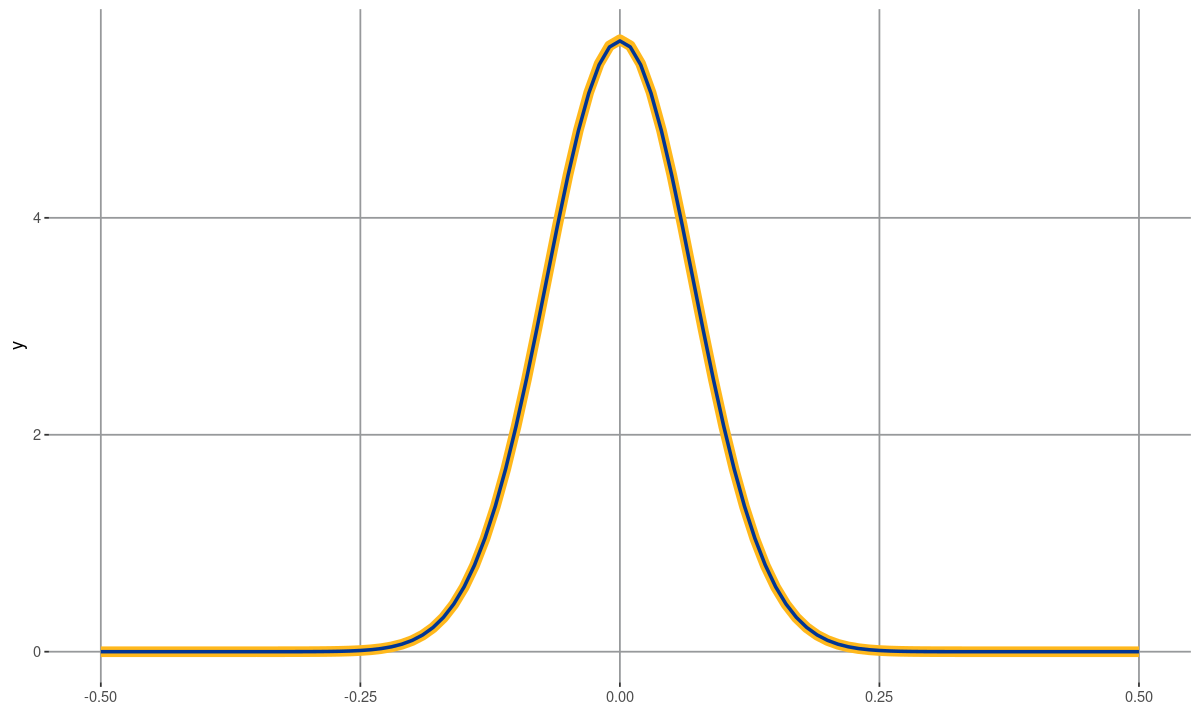

In [7]:
base+
geom_function( fun = dnorm,color=Pitt.Gold, size=3,args=list(mean=0,sd=sqrt(2/400)) )+ # actual dist for error 
geom_function( fun = dnorm,color=Pitt.Blue, size=1,args=list(mean=0,sd=se.lambda) )+ # estimated dist for error
xlim(-0.5, 0.5)

Similarly, we could have estimated this using the second derivative of the log-likelihood (the Hessian)

In [9]:
pois.hess.est<-function(kj) ( -kj /lambda.hat^2 ) # Second derivative of L at outcome kj
pois.hess <- sapply(pois.data, pois.hess.est) # apply this over all of the kj data
EstVar.H<- 1/mean(-pois.hess)  # Take the negative of the mean to get I, then invert
sqrt(EstVar.H/400) # <--- Standard Error!

[1] 0.07150175

Note that this is not identical to the score calculation! The identity only holds at the true value $\lambda$ under the expectation... However, if we're close to the true value, the approximation is still good. 

## Numerical Approximations
In many situations it may be a bit too much for us to calculate the derivatives analytically, in which case, we could rely on our numerical approximations.

Here I'll use: $$\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}=f^\prime(x)+O(\epsilon^2)$$

In [11]:
d.log.likelihood.poisson <-  function(kj,lambda,eps){  
    (dpois(kj,lambda=lambda+eps,log=TRUE)-dpois(kj,lambda=lambda-eps,log=TRUE))/(2*eps)
} 

In [12]:
# Our analytical scores squared and averaged
mean(scores**2)
# Same thing, but with numerical derivatives...
mean( sapply(
    pois.data,
    d.log.likelihood.poisson,
    lambda=lambda.hat,
    eps=1e-4)**2
    )
se.lambda.numerical<-sqrt(1/mean(
    sapply(pois.data,d.log.likelihood.poisson,lambda=lambda.hat,eps=1e-4)**2)/400) 

[1] 0.4980781

[1] 0.4980781

In [13]:
se.lambda.numerical<-sqrt(1/mean(sapply(pois.data,d.log.likelihood.poisson,lambda=lambda.hat,eps=1e-4)**2)/400)
se.lambda.numerical

[1] 0.07084697

Note that here we're taking a numerical derivative for every entry. In this case, the score/versus Hessian would be about the same in terms of complication to compute

In general though if we have $k$-parameters to estimate, the variance covariance matrix we're looking for will be a $k\times k$ matrix. When we're using the score method this means computing $n$ different $k$-dimensional numerical derivatives to get an approximation for $\mathbb{E}\left[\mathbf{s}(\boldsymbol{\theta})\mathbf{s}(\boldsymbol{\theta})^T\right]$.

In contrast, if we wanted to calculate things with the second derivatives, each Hessian matrix is a $k\times k $ matrix, so we'd have to do $n\cdot k^2$ numerical derivatives!

For example, suppose we have two observable groups and we're trying to estimate the two means.

In [15]:
# Make someone randomly either group 1 or 2
df.two.groups<- data.frame(Group=(ifelse(runif(400)>1/2,1,2)))
# if they're group one, draw a poisson lambda=1.5, otherwise poisson lambda=2.5
df.two.groups["k"]<- sapply(df.two.groups$Group,  
                            function(x) if (x==1) {rpois(1,1.5)} else {rpois(1,2.5)}
                                ) 
head(df.two.groups)

Group k
1 2     4
2 1     2
3 2     1
4 2     2
5 1     0
6 1     1

In [16]:
lambda.hat.1 <- mean( subset(df.two.groups, Group==1)$k)
lambda.hat.2 <- mean( subset(df.two.groups, Group==2)$k)
c(lamba1=lambda.hat.1,lambda2=lambda.hat.2)

lamba1  lambda2 
1.502591 2.497585

In [17]:
eps <- 1e-6 # eps for numerical derivative
nn <- nrow(df.two.groups) # data size
scoreVector <- matrix(0,nrow=nn,ncol=2) # initialize the matrix to zeros everywhere
# Using a for loop I write the derivative with resepect to the two group means
for (i in 1:nn) {
    grp <- df.two.groups[i,"Group"] # data row group
    kj <- df.two.groups[i,"k"]      # data row  k
    if (grp==1) { # If group 1, then d/d lambda1 is non zero
        scoreVector[i,1] <- (dpois(kj ,lambda=lambda.hat.1+eps,log=TRUE)-dpois(kj,lambda=lambda.hat.1-eps,log=TRUE))/(2*eps)
    }
    else{ # Otherwise group 2, then d/d lambda2 is non zero
         scoreVector[i,2] <- (dpois(kj ,lambda=lambda.hat.2+eps,log=TRUE)-dpois(kj,lambda=lambda.hat.2-eps,log=TRUE))/(2*eps)
    }
}
# This calculates s *s T for each of N observations and sums them together through a matrix operation
Sigma <- solve(t(scoreVector)%*%scoreVector/nn)
Sigma

[,1]     [,2]    
[1,] 3.177188 0.000000
[2,] 0.000000 4.894904

As should be obvious, our estimators for the two groups are entirely independent where:
$$\sqrt{N}\left(\begin{array}{c} \hat{\lambda_1}-\lambda_1 \\ \hat{\lambda_2}-\lambda_2 \end{array}\right)\rightarrow^D \mathcal{N}\left\{  
0,\hat{\boldsymbol{\Sigma}}
\right\}$$

Where the lack of any correlation in the estimates means that 
$$\hat{\boldsymbol{\Sigma}}=\left(\begin{array}{cc}
\hat{\sigma}^2_{\lambda_1} & 0 \\
0 & \hat{\sigma}^2_{\lambda_2}
\end{array} \right)$$

So we can calculate the standard errors as:

In [18]:
data.frame(group=c(1,2),   mean=c(lambda.hat.1,lambda.hat.2) , se=sqrt( diag(Sigma)/nn) )
#diag() function picks out the diagonal elements in the Sigma matrix!

group mean     se        
1 1     1.502591 0.08912334
2 2     2.497585 0.11062215

Note that another way of setting up this model would have been to say group 1's average was $\lambda_1$ and to define group 2's average as $\lambda_1+\lambda_2$. 

It's pretty easy to show that our estimates would then be given by:

In [19]:
alt.lambda.hat.1 <- lambda.hat.1
alt.lambda.hat.2 <- lambda.hat.2-lambda.hat.1

So now $\lambda_1$ appears in all the rows...

In [20]:
eps <- 1e-6
nn <- nrow(df.two.groups)
a.scoreVector <- matrix(0,nrow=nn,ncol=2)

for (i in 1:nn) {
    grp <- df.two.groups[i,"Group"]
    kj <- df.two.groups[i,"k"]
    if (grp==1) { # If group 1, take derivative just over lambda1
        a.scoreVector[i,1] <- (dpois(kj ,lambda=alt.lambda.hat.1+eps,log=TRUE)-dpois(kj,lambda=alt.lambda.hat.1-eps,log=TRUE))/(2*eps)
    }
    else{ # Group 2, take derivative over both lambda1 *and* lambda2
        a.scoreVector[i,1] <- (dpois(kj ,lambda=alt.lambda.hat.1+alt.lambda.hat.2+eps,log=TRUE)-dpois(kj,lambda=alt.lambda.hat.1-eps+alt.lambda.hat.2,log=TRUE))/(2*eps)
        a.scoreVector[i,2] <- (dpois(kj ,lambda=alt.lambda.hat.1+alt.lambda.hat.2+eps,log=TRUE)-dpois(kj,lambda=alt.lambda.hat.1+alt.lambda.hat.2-eps,log=TRUE))/(2*eps)
    }
}
# This calculates s *s T for each of N observations and sums them together through a matrix operation
a.Sigma <- solve(t(a.scoreVector)%*%a.scoreVector/nn)
a.Sigma

[,1]      [,2]     
[1,]  3.177188 -3.177188
[2,] -3.177188  8.072092

However, it we take the *sum* of the two coefficients, this should have the same variance as the second group from before:

In [21]:
a.Sigma
t(c(1,1)) %*% a.Sigma %*% c(1,1)

[,1]      [,2]     
[1,]  3.177188 -3.177188
[2,] -3.177188  8.072092

[,1]    
[1,] 4.894904

## Soccer parameter estimates
---

Going back to our soccer estimations, let's calculate the standard errors the hard way, before I show you the *easy* way. 

Load in the data

In [22]:
load("soccer/soccerData.rda")
head(estimData)

HomeTeam   HomeNo AwayTeam       AwayNo FTHG FTAG
1 Brentford  1      Arsenal        19     2    0   
2 Man United 2      Leeds          14     5    1   
3 Burnley    3      Brighton       16     1    2   
4 Chelsea    4      Crystal Palace 13     3    0   
5 Everton    5      Southampton    17     3    1   
6 Leicester  6      Wolves         18     1    0

Estimation Equations:

In [23]:
likelihood.function.list <- function(theta) {
    alpha<- replicate(20, 0) #initialize
    delta<- replicate(20, 0)
    for (i in 1:19) { # Team level parameters 
        alpha[i]<- theta[ 2*(i-1)+1 ]
        delta[i]<- theta[ 2*(i-1)+2 ]
        }
    alpha[20] <-  -1*sum( alpha[1:19] ) #sum to zero constraint
    delta[20] <-  -1* sum( delta[1:19] ) #sum to zero constraint
    lambdaH<-replicate(nrow(estimData), 0)
    lambdaA<-replicate(nrow(estimData), 0)
    prob<-replicate(2*nrow(estimData), 0)
    for (row in 1:nrow(estimData) ){
        H<-estimData$HomeNo[row]
        gH<-estimData$FTHG[row]
        A<-estimData$AwayNo[row]
        gA<-estimData$FTAG[row]
                 # mean param+ home + alpha_i- delta_j
        lambdaH<- theta[39]+theta[40]+alpha[H]-delta[A]
                  # mean param +    alpha_j -  delta_i
        lambdaA<- theta[39]  +     alpha[A]-delta[ H ]
        prob[2*(row-1)+1] <- gH*lambdaH - exp(lambdaH) - log(factorial(gH) ) #Home Goal part
        prob[2*(row-1)+2] <- gA*lambdaA  -exp(lambdaA) - log(factorial(gA) ) #Away part
    }
    return(prob)
}

Rather than re-estimate, I'm just going to load in the saved estimates from the last class

In [24]:
load("soccer/SoccerEst.rda")
head(outModel)
theta.out

alpha       delta       score     concede  
Brentford  -0.08378594 -0.12088532 1.1067302 1.3580925
Man United  0.25044296  0.11960771 1.5459503 1.0677868
Burnley    -0.30633295 -0.10645890 0.8859125 1.3386407
Chelsea     0.24919197  0.30567824 1.5440175 0.8864927
Everton    -0.07369851 -0.03024340 1.1179507 1.2404066
Leicester   0.17178689  0.03068409 1.4290112 1.1670880

[1] -0.083785941 -0.120885325  0.250442958  0.119607709 -0.306332955
 [6] -0.106458899  0.249191971  0.305678241 -0.073698509 -0.030243405
[11]  0.171786886  0.030684088 -0.266430787 -0.230011514 -0.669058695
[16] -0.403596091 -0.230094031 -0.182945728  0.254361310  0.102124446
[21]  0.517265581  0.436020678 -0.003586857 -0.085288909 -0.196743711
[26] -0.100170410 -0.014907843 -0.276671446  0.603097408  0.491780522
[31] -0.262575354  0.046776231 -0.064538387 -0.217861009 -0.122946892
[36]  0.167125222  0.138710446  0.105257875  0.185195821  0.150997794

So, we need to calculate the score vector which will be an $N\times 40$ matrix...

In [25]:
pVec <-likelihood.function.list(theta.out) # Probability for each score
eps=1e-6 # Num. deriv small distance 
score.matrix <- matrix(0,nrow=length(pVec),ncol=length(theta.out)) # initialize the score! to 0 
for (i in 1:length(theta.out) ){ # for each of the 40 different parameters 
    epsVec <- rep(0,length(theta.out)) # Initialize this as a vector of 40 zeros
    epsVec[i] <- eps #  Make location i epsilon bigger!
    # Now add and subtract the epsilon vector to theta, and calculate likelihood vector at each
    # to get the numerical derivative, which we enter in column i
    score.matrix[ ,i]=(likelihood.function.list(theta.out+epsVec)- 
                       likelihood.function.list(theta.out-epsVec))/(2*eps)
}
# Get an analog of E[s(theta)^t s(theta)] by taking the average, then get the inverse of this
aVCM<- solve(  (t(score.matrix)%*%score.matrix)/length(pVec)) /length(pVec)
# Standard errors for each separate variable are sqrt of diagonal terms
seVector <- sqrt(diag(aVCM))

Get the team names:

In [26]:
teamNames <- rownames(outModel) 

Fancy it up to make it easier to see what it's saying:

In [27]:
alphaOut<- rep(0,20) #initialize
deltaOut<- rep(0,20)
alphaOutSE<- rep(0,20)
deltaOutSE<- rep(0,20)
sumAlpha <- rep(0,40)
sumDelta <- rep(0,40)
# Set values
for (i in 1:19) {
    sumAlpha[2*(i-1)+1]=-1
    sumDelta[2*(i-1)+2]=-1
    alphaOut[i]<- theta.out[2*(i-1)+1]
    alphaOutSE[i]<- seVector[2*(i-1)+1]
    deltaOut[i]<- theta.out[2*(i-1)+2]
    deltaOutSE[i]<- seVector[2*(i-1)+2]
    }
# Write the constrained value and se
alphaOut[20] <-  -1*sum( alphaOut[1:19] )  #sum to zero constraint
alphaOutSE[20] <-  sqrt(t(c(sumAlpha))%*%aVCM%*%c(sumAlpha)) # have to calculate this from others
deltaOut[20] <-  -1* sum( deltaOut[1:19] )
deltaOutSE[20] <-  sqrt(t(c(sumAlpha))%*%aVCM%*%c(sumAlpha)) # have to calculate this from others
names(alphaOut)<- teamNames
names(deltaOut)<- teamNames

And look at the overall mean/home effect variables too:

In [28]:
# Mean Param
general.params <- c(theta.out[39],seVector[39],theta.out[40],seVector[40])
names(general.params) <- c("mu","se(mu)","eta","se(eta)")
round(general.params,4)

mu  se(mu)     eta se(eta) 
 0.1852  0.0297  0.1510  0.0380

In [29]:
mod.coded <- data.frame(alpha=round(alphaOut,3),alpha.se=round(alphaOutSE,3),delta=round(deltaOut,3),delta.se=round(deltaOutSE,3))
mod.coded

alpha  alpha.se delta  delta.se
Brentford      -0.084 0.161    -0.121 0.164   
Man United      0.250 0.070     0.120 0.077   
Burnley        -0.306 0.094    -0.106 0.071   
Chelsea         0.249 0.073     0.306 0.084   
Everton        -0.074 0.086    -0.030 0.072   
Leicester       0.172 0.070     0.031 0.080   
Watford        -0.266 0.100    -0.230 0.082   
Norwich        -0.669 0.144    -0.404 0.096   
Newcastle      -0.230 0.097    -0.183 0.078   
Tottenham       0.254 0.069     0.102 0.090   
Liverpool       0.517 0.067     0.436 0.087   
Aston Villa    -0.004 0.094    -0.085 0.085   
Crystal Palace -0.197 0.085    -0.100 0.079   
Leeds          -0.015 0.106    -0.277 0.087   
Man City        0.603 0.058     0.492 0.090   
Brighton       -0.263 0.095     0.047 0.088   
Southampton    -0.065 0.093    -0.218 0.064   
Wolves         -0.123 0.087     0.167 0.084   
Arsenal         0.139 0.085     0.105 0.089   
West Ham        0.110 0.077    -0.051 0.077

## Generalized Linear Models
---
Fortunately, and we will talk about this more as we introduce other models, if we can outline the effects on the mean as the sum of a number of linear parts, we can solve this type of model in R using what is called a *generalized linear model*.

While the linearity of the predictor is given, the form of how this predictor is used for understanding the outcome $y$ can be highly non-linear.

Here, we reshape the scoreline data to make the predictor $\lambda$ a simple linear combination.  

In [31]:
library(reshape) # I need to make the data long/"tidy" so I reshape it using `melt`
df <- melt(estimData,id.vars=c("HomeTeam","AwayTeam"),measure.vars=c("FTHG","FTAG"))
df["AttackTeam"] <- ""
df["DefTeam"] <- ""
df["Home"] <- FALSE
for (i in 1:nrow(df)){
    if (df[i,"variable"]=="FTHG"){
        df[i,"AttackTeam"] <- df[i,"HomeTeam"] 
        df[i,"DefTeam"] <- df[i,"AwayTeam"] 
        df[i,"Home"] <- TRUE
    }
    else{
        df[i,"AttackTeam"]=df[i,"AwayTeam"]
        df[i,"DefTeam"]=df[i,"HomeTeam"]
        df[i,"Home"]=FALSE
    }
} 
df["Off"] <- relevel(as.factor(df$AttackTeam ),"Man City")
df["Def"] <- relevel(as.factor(df$DefTeam ),"Man City")
head(df[ ,c("value","Home","Off","Def")])

value Home Off        Def           
1 2     TRUE Brentford  Arsenal       
2 5     TRUE Man United Leeds         
3 1     TRUE Burnley    Brighton      
4 3     TRUE Chelsea    Crystal Palace
5 3     TRUE Everton    Southampton   
6 1     TRUE Leicester  Wolves

We will now attempt to estimate this as a model where the log-mean of the Poisson draw for each observation (so  the $\log(\lambda)$) is given by:
* a constant/intercept
* an indicator for whether the team was at home
* a factor variable for the attacking team
* a factor variable for the defending team

In [32]:
glm.mod <- glm(value~as.factor(Home)+Off+ , family=poisson, data=df)
summary(glm.mod)


Call:
glm(formula = value ~ as.factor(Home) + Off + Def, family = poisson, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5222  -1.1675  -0.1070   0.5185   4.0609  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.29613    0.11727   2.525 0.011560 *  
as.factor(Home)TRUE  0.15118    0.03605   4.193 2.75e-05 ***
OffArsenal          -0.46427    0.09346  -4.968 6.78e-07 ***
OffAston Villa      -0.60646    0.10672  -5.683 1.32e-08 ***
OffBrentford        -0.68741    0.17433  -3.943 8.04e-05 ***
OffBrighton         -0.86586    0.10610  -8.161 3.33e-16 ***
OffBurnley          -0.90979    0.10934  -8.321  < 2e-16 ***
OffChelsea          -0.35384    0.08992  -3.935 8.32e-05 ***
OffCrystal Palace   -0.79989    0.10472  -7.638 2.20e-14 ***
OffEverton          -0.67681    0.10024  -6.752 1.46e-11 ***
OffLeeds            -0.61788    0.12579  -4.912 9.01e-07 ***
OffLeicester        -0.43117    0.09287  -4.643

Note that the team values are different, though the normalization here is also different. However, the *home*  parameter ($\eta$ in our previous notation) is obviously comparable.

In [33]:
exp(0.151185)

[1] 1.163212

Let's check the parameters we're getting for two teams:

So we'll examine Leeds playing against Man City at home.

The model output here indicates the **log** of Leeds's expected goals at home against Man City is:

In [35]:
coef(glm.mod)["(Intercept)"]+coef(glm.mod)["as.factor(Home)TRUE"]+coef(glm.mod)["OffLeeds"]

(Intercept) 
 -0.1705619

So we can take the exponential of this to get the true mean for the expected goals:

In [36]:
exp( coef(glm.mod)["(Intercept)"]+coef(glm.mod)["as.factor(Home)TRUE"]+coef(glm.mod)["OffLeeds"] )

(Intercept) 
  0.8431909

Our model estimates calculated by the hand coded model indicate:

In [37]:
general.params["mu"]+general.params["eta"]+mod.coded["Leeds","alpha"]-mod.coded["Man City","delta"]
exp(general.params["mu"]+general.params["eta"]+mod.coded["Leeds","alpha"]-mod.coded["Man City","delta"])

mu 
-0.1708064

mu 
0.8429848

**Note** there are some small differences, indicating the extent to which features of the optimization can be important, especially when there are many parameters in the model

Note that all of our standard errors are constructed over the parameters, which are not directly interpretable as means. 
* The parameters are inputs into the large model
* Reporting either the parameter or it's standard error only has meaning within the context of the model
* We will have to come up with a way of expressing the effects in a more meaningful way!